In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
yum_ingr = pd.read_pickle('data/yummly_ingr.pkl')
yum_ingrX = pd.read_pickle('data/yummly_ingrX.pkl')
yum_tfidf = pd.read_pickle('data/yum_tfidf.pkl')

#select four cuisines and plot tsne clustering with ingredients

df_ingr = yum_ingrX.copy()
# sublist = list(set(yum_ingr['cuisine']))
df_ingr['cuisine'] = yum_ingr['cuisine']
df_ingr['recipeName'] = yum_ingr['recipeName']

print(df_ingr.keys())

Index(['almond', 'anise', 'apple', 'apricot', 'artichoke', 'asparagus',
       'avocado', 'bacon', 'banana', 'barley',
       ...
       'whitefish', 'whole grain wheat flour', 'wine', 'wood', 'yam', 'yeast',
       'yogurt', 'zucchini', 'cuisine', 'recipeName'],
      dtype='object', length=238)


In [5]:
df = pd.DataFrame(df_ingr)
df_dropped = df.drop(columns=['cuisine', 'recipeName'])
df_dropped_encoded = pd.get_dummies(df_dropped, columns=df_dropped.columns, drop_first=True)

In [6]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dropped_encoded)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want
X_pca = pca.fit_transform(X_scaled)

# Convert the PCA output back to a DataFrame for easier handling
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Display the PCA result
print(pca_df)

      Principal Component 1  Principal Component 2
0                 -2.490783              -1.011633
1                 -0.690057              -0.474103
2                 -0.902687              -0.698736
3                 -1.485827              -1.202679
4                 -1.452261              -1.412869
...                     ...                    ...
5617               4.578969              -1.806938
5618               9.090491              -0.840867
5619               2.618344              -0.254918
5620               6.718070              -3.377124
5621               4.137933              -1.115565

[5622 rows x 2 columns]


In [7]:
pca.explained_variance_

array([5.08162563, 3.98992438])

In [8]:
# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

print(explained_variance, cumulative_variance)

[0.02152848 0.01690345] [0.02152848 0.03843193]


Percentage of variability explained by each component:
Component 1: 2.15%
Component 2: 1.69%

Number of components required to explain 95% variability: 1


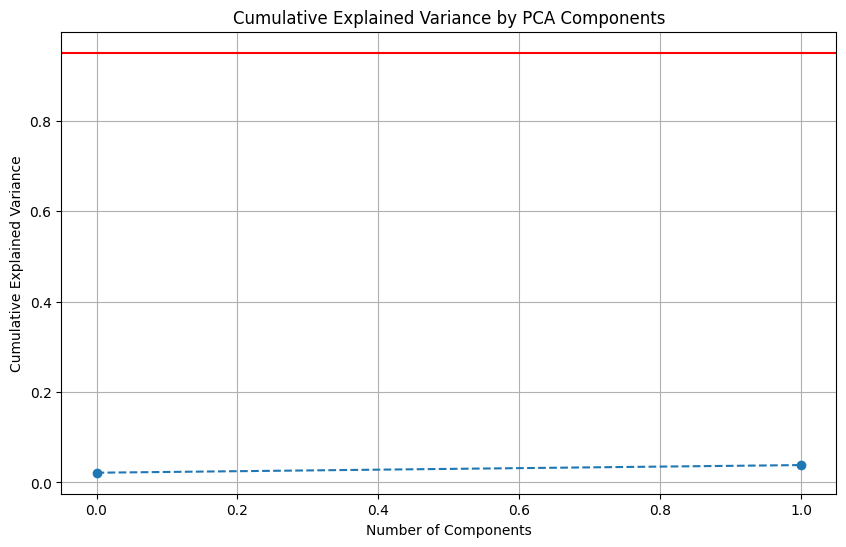

In [9]:
# Determine the number of components needed to explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # Add 1 because np.argmax returns 0-based index

# Print the percentage of variability explained by each component
print("Percentage of variability explained by each component:")
for i, var in enumerate(explained_variance):
    print(f"Component {i + 1}: {var * 100:.2f}%")

# Print the number of components needed to explain 95% variability
print(f"\nNumber of components required to explain 95% variability: {n_components_95}")

# Optional: Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

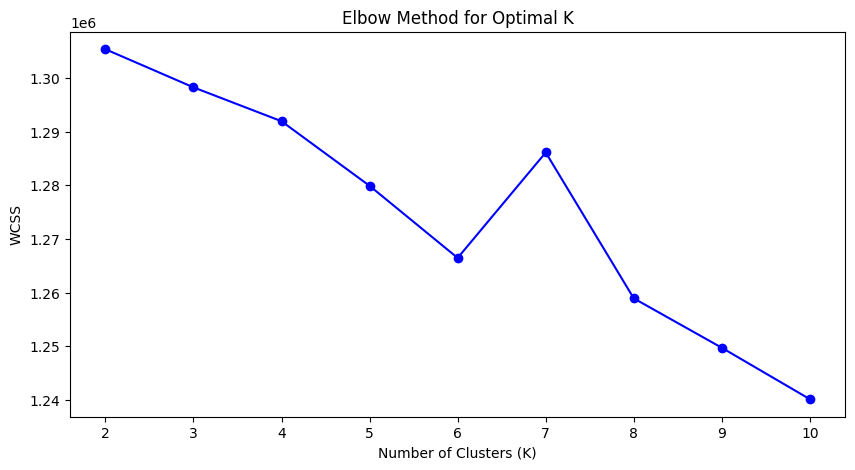

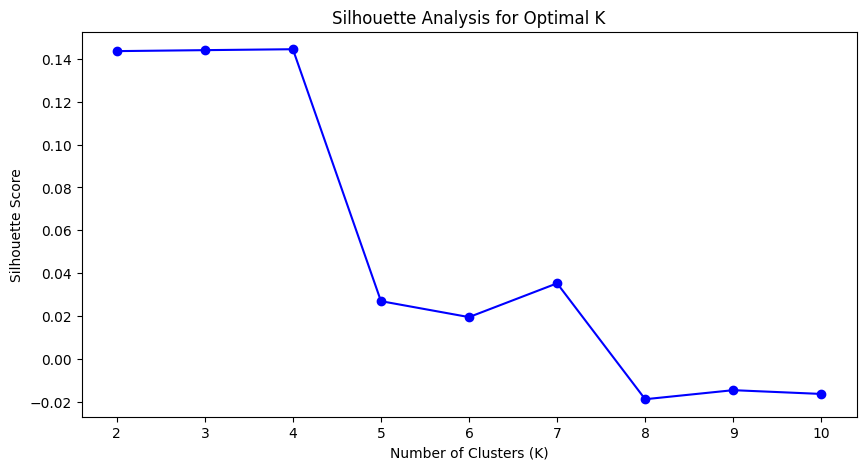

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming data has been preprocessed and you have a DataFrame `yum` containing only the ingredients
# Drop 'cuisine' and 'recipeName' columns if still present
ingredients_data = df_dropped_encoded

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ingredients_data)

# Step 2: Apply K-means for a range of K
wcss = []
silhouette_scores = []
K_range = range(2, 11)  # Checking for K from 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    
    # Calculate WCSS for elbow method
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score for each K
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Step 3: Plot Elbow Method
plt.figure(figsize=(10,5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 4: Plot Silhouette Analysis
plt.figure(figsize=(10,5))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

DBSCAN Silhouette Score: -0.3410123102141308
Hierarchical Clustering Silhouette Score: 0.04139965437858856
GMM Silhouette Score: 0.0173490122107147


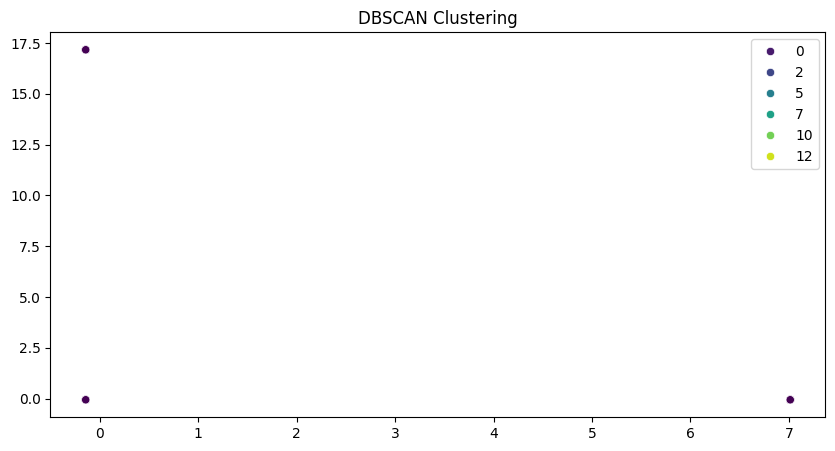

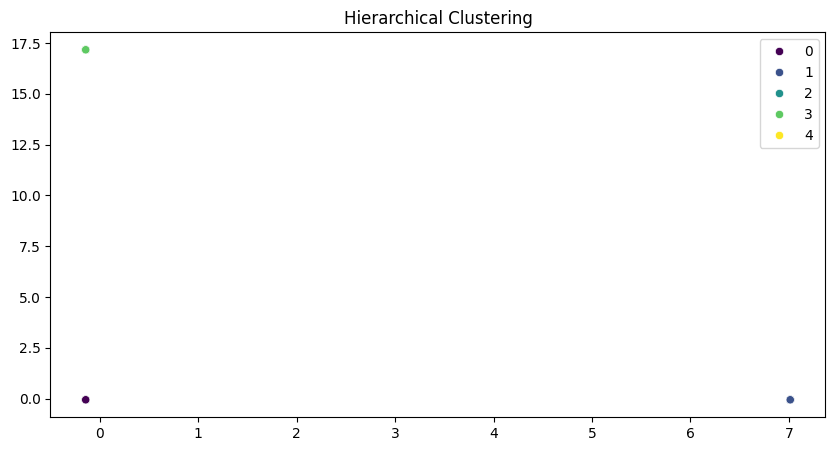

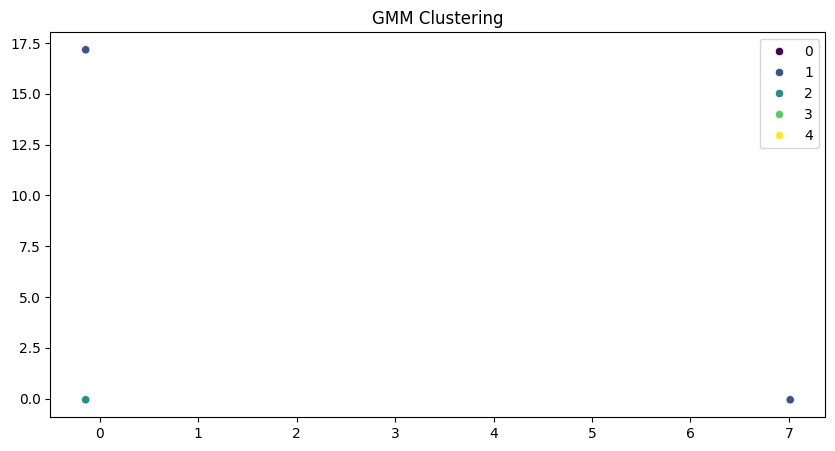

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is stored in 'yum' DataFrame and 'ingredients_data' contains the preprocessed ingredient columns

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dropped_encoded)

# Step 2: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Step 3: Hierarchical Clustering
hier_clust = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Example with 5 clusters
hier_labels = hier_clust.fit_predict(scaled_data)

# Step 4: Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)  # Example with 5 clusters
gmm_labels = gmm.fit_predict(scaled_data)

# Step 5: Evaluation - Silhouette Scores
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
hier_silhouette = silhouette_score(scaled_data, hier_labels)
gmm_silhouette = silhouette_score(scaled_data, gmm_labels)

print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hier_silhouette}')
print(f'GMM Silhouette Score: {gmm_silhouette}')

# Step 6: Visualize the clustering results (for 2D data)
# You can reduce data using PCA/TSNE for visualization if you have more than 2 dimensions

# Visualize DBSCAN
plt.figure(figsize=(10,5))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Visualize Hierarchical Clustering
plt.figure(figsize=(10,5))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=hier_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Visualize GMM Clustering
plt.figure(figsize=(10,5))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=gmm_labels, palette='viridis')
plt.title('GMM Clustering')
plt.show()